# Reflection Test

In [1]:
using Plots

In [2]:
include("./misc.jl")

Main.Misc

In [3]:
function plot_error(dirs; nbuf = 2, lev = 1, tmax = 2.0, parent_dir = expanduser("~/docker-workspace/simulations/"))
    plt = Misc.plot_error(parent_dir, dirs, analytical_psi, nbuf, lev, tmax;
                          f_error = (err, i) -> err)
    return plt
end

plot_error (generic function with 1 method)

## Analytic solution

In [4]:
function analytical_psi(t, x; A=1, sig=0.25, c=1)
    return 0.5 * (A * exp(-(c*t - x)^2/sig^2) + A * exp(-(c*t + x)^2/sig^2))
end

analytical_psi (generic function with 1 method)

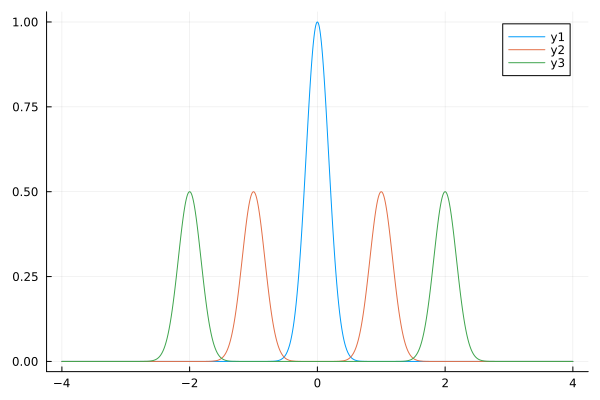

In [5]:
plot(x->analytical_psi(0.0, x), -4.0, 4.0)
plot!(x->analytical_psi(1.0, x), -4.0, 4.0)
plot!(x->analytical_psi(2.0, x), -4.0, 4.0)

## Numerical Errors

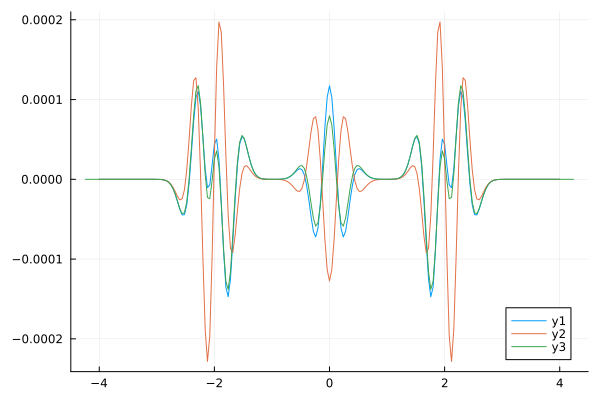

In [6]:
plot_error(
    [
        "Gaussian_2levels_nx201_Mongwane",
        "Gaussian_2levels_nx201_MongwaneTrans",
        "Gaussian_2levels_nx201_Carpet",
    ]; nbuf = 2)

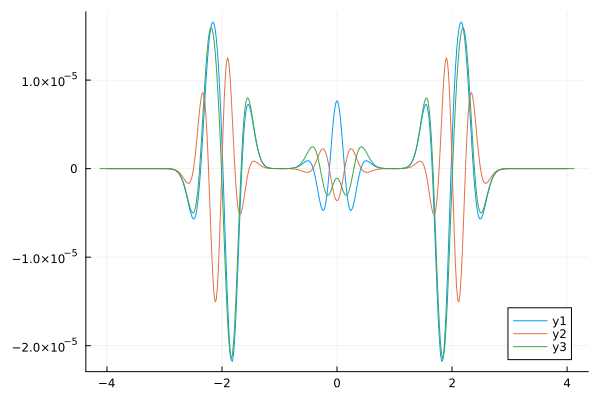

In [7]:
plot_error(
    [
        "Gaussian_2levels_nx401_Mongwane",
        "Gaussian_2levels_nx401_MongwaneTrans",
        "Gaussian_2levels_nx401_Carpet",
    ]; nbuf = 2)

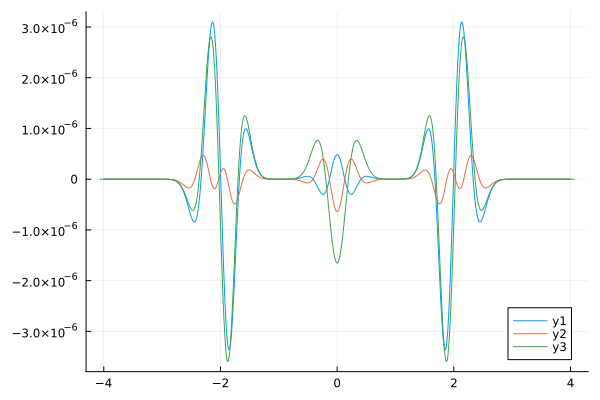

In [8]:
plot_error(
    [
        "Gaussian_2levels_nx801_Mongwane",
        "Gaussian_2levels_nx801_MongwaneTrans",
        "Gaussian_2levels_nx801_Carpet",
    ]; nbuf = 2)